# Data Vizualisation and EDA for task 2, 3, 4

### Setup

In [36]:
import numpy as np
import pandas as pd
from utils import task2_df, task4_df, plot_feature_by_genre, task1_df, plot_corr
import matplotlib.pyplot as plt

In [37]:
dfTask1 = task1_df()
dfGenre = task2_df()
df5s, df10s, df30s = task4_df()
dfGenre

,spectral_rolloff_mean,mfcc_1_mean,spectral_centroid_mean,tempo
Genre,,,,
pop,"[5351.909304403299, 6839.566975407556, 6873.34...","[9.675073623657228, -63.63505554199219, -119.3...","[2569.255822743332, 2844.070407964752, 2765.64...","[117.45383522727272, 107.666015625, 161.499023..."
disco,"[6098.354790749565, 5710.898800309597, 5506.55...","[-53.4480094909668, -57.66926956176758, -14.57...","[3099.184146958609, 2739.075570318749, 2848.22...","[129.19921875, 112.34714673913044, 123.046875,..."
metal,"[4148.1665832708495, 5409.3672902960525, 4547....","[-129.7239227294922, -42.029930114746094, -93....","[1988.1097633983848, 2741.0869519388666, 2463....","[117.45383522727272, 151.99908088235293, 129.1..."
classical,"[2377.393957557324, 2868.049323964783, 3176.23...","[-276.0390319824219, -315.0445251464844, -259....","[1279.1711366673296, 1497.07629558872, 1705.73...","[112.34714673913044, 103.359375, 107.666015625..."


## Task 2 graph

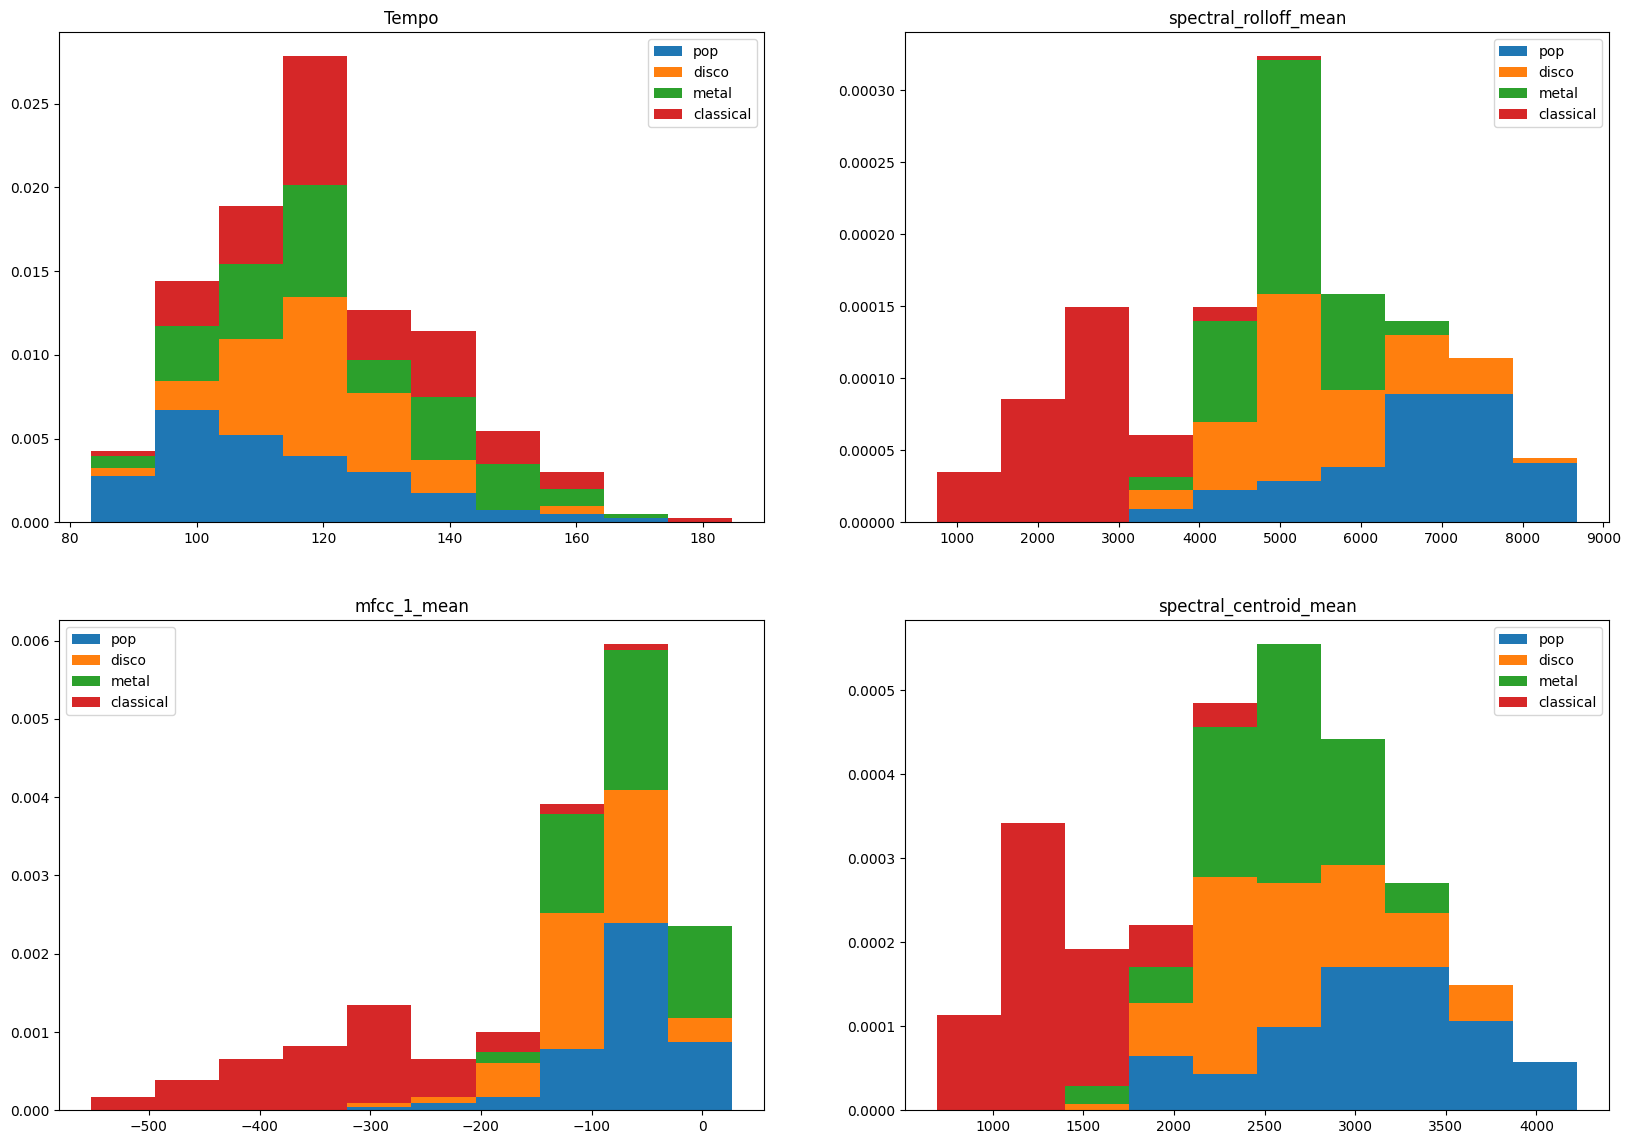

In [38]:
plt.figure(figsize=(20, 14))

plt.subplot(2,2,1)
plt.hist(dfGenre['tempo'], density=True, stacked=True, label=dfGenre.index)
plt.title("Tempo")
plt.legend()

plt.subplot(2,2,2)
plt.hist(dfGenre['spectral_rolloff_mean'],density=True, stacked=True , label=dfGenre.index)
plt.title("spectral_rolloff_mean")
plt.legend()

plt.subplot(2,2,3)
plt.hist(dfGenre['mfcc_1_mean'],density=True, stacked=True , label=dfGenre.index)
plt.title("mfcc_1_mean")
plt.legend()

plt.subplot(2,2,4)
plt.hist(dfGenre['spectral_centroid_mean'],density=True, stacked=True , label=dfGenre.index)
plt.title("spectral_centroid_mean")
plt.legend()

plt.savefig("../Figures/task2_stacked.png")

## EDA

### Skewness of distributions 

In [39]:
summary = df30s.describe()
summary

,Track ID,zero_cross_rate_mean,zero_cross_rate_std,rmse_mean,rmse_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_rolloff_mean,...,mfcc_4_std,mfcc_5_std,mfcc_6_std,mfcc_7_std,mfcc_8_std,mfcc_9_std,mfcc_10_std,mfcc_11_std,mfcc_12_std,GenreID
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,497.316162,0.103587,0.049381,0.130414,0.048321,2199.327355,631.688027,2239.681058,350.096755,4565.584859,...,14.355828,12.739387,10.912321,10.491663,9.170833,9.207086,8.847369,8.487715,8.100976,4.479798
std,288.594509,0.041928,0.023501,0.065648,0.026827,716.918309,266.930225,527.173141,120.330949,1576.215417,...,3.820369,3.539263,2.872429,2.571867,2.060515,1.991026,1.900986,1.893053,1.769672,2.874366
min,0.000000,0.021701,0.006633,0.005270,0.002069,570.150688,89.206350,899.979779,105.640960,749.528801,...,5.860211,5.475198,4.562885,5.384640,4.726604,5.086445,4.385247,4.627245,4.320407,0.000000
25%,248.250000,0.070197,0.032797,0.086429,0.030663,1623.214609,429.050122,1903.010596,259.193510,3377.483743,...,11.403747,10.092047,8.757841,8.587303,7.579172,7.743728,7.465550,7.146712,6.853422,2.000000
50%,495.500000,0.099439,0.044973,0.120666,0.042622,2208.737431,582.419765,2218.084461,335.405554,4658.484331,...,14.226627,12.353450,10.671228,10.240237,8.974938,8.929217,8.623109,8.288189,7.889328,4.000000
75%,745.750000,0.131846,0.060262,0.175362,0.059791,2685.204362,784.303408,2575.647770,426.568058,5525.670754,...,16.943464,15.109073,12.686475,12.093560,10.472463,10.454274,9.958708,9.559790,9.076086,7.000000
max,998.000000,0.274829,0.169380,0.397851,0.166458,4434.948742,1742.272546,3509.582338,833.754161,8676.447535,...,30.047882,32.917904,22.605988,20.070549,19.628746,17.852739,18.811926,24.301636,17.253351,9.000000


In [40]:
skew = ((summary.loc["mean"] - summary.loc["50%"])/(summary.loc['max']-summary.loc['min']))
skew.name = "scaled mean - median" 
skew.sort_values()

mfcc_1_mean             -0.041375
mfcc_5_mean             -0.015800
spectral_rolloff_mean   -0.011719
chroma_stft_10_std      -0.008600
chroma_stft_8_std       -0.008326
                           ...   
tempo                    0.030533
rmse_var                 0.034667
spectral_flatness_var    0.043813
spectral_contrast_var    0.046117
GenreID                  0.053311
Name: scaled mean - median, Length: 65, dtype: float64

## Genre discrimination with specific feature 

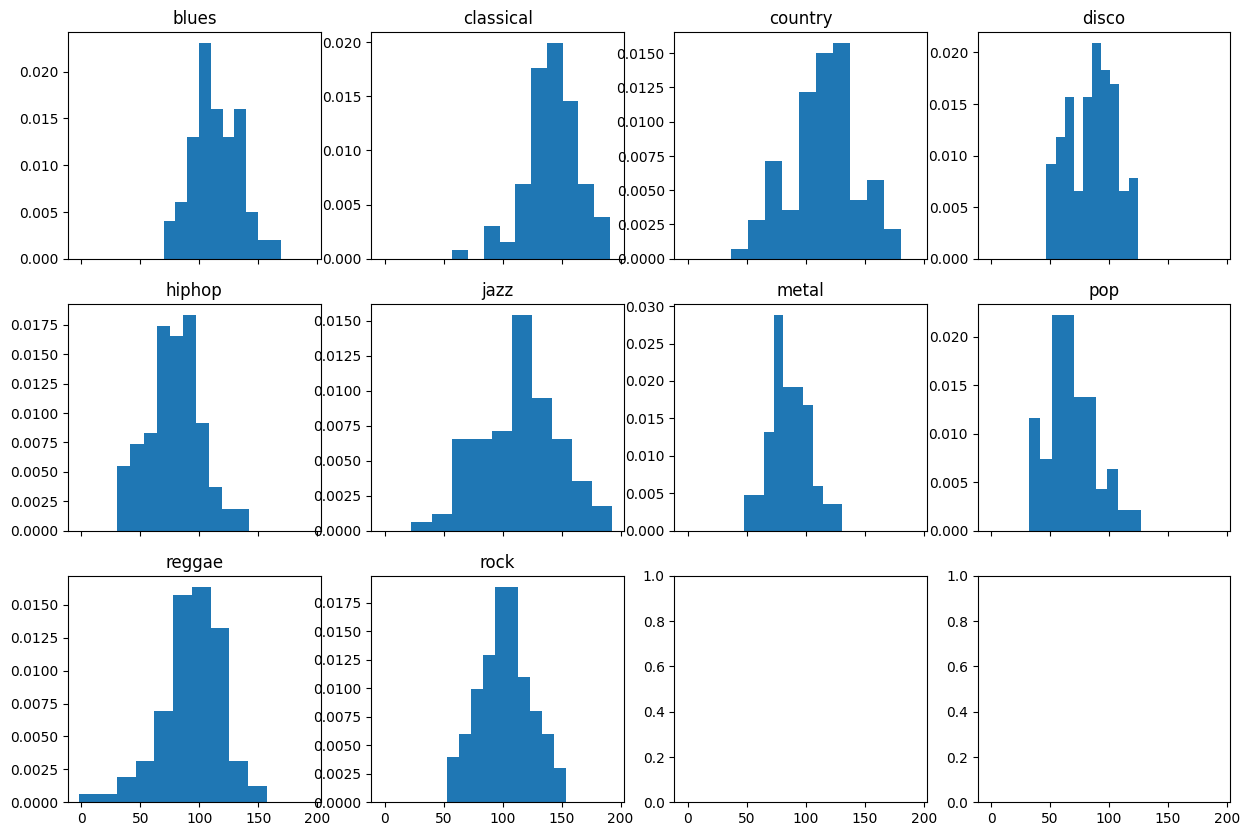

In [41]:
plot_feature_by_genre('mfcc_2_mean', df30s)

## Correlation matrix of the 65 features

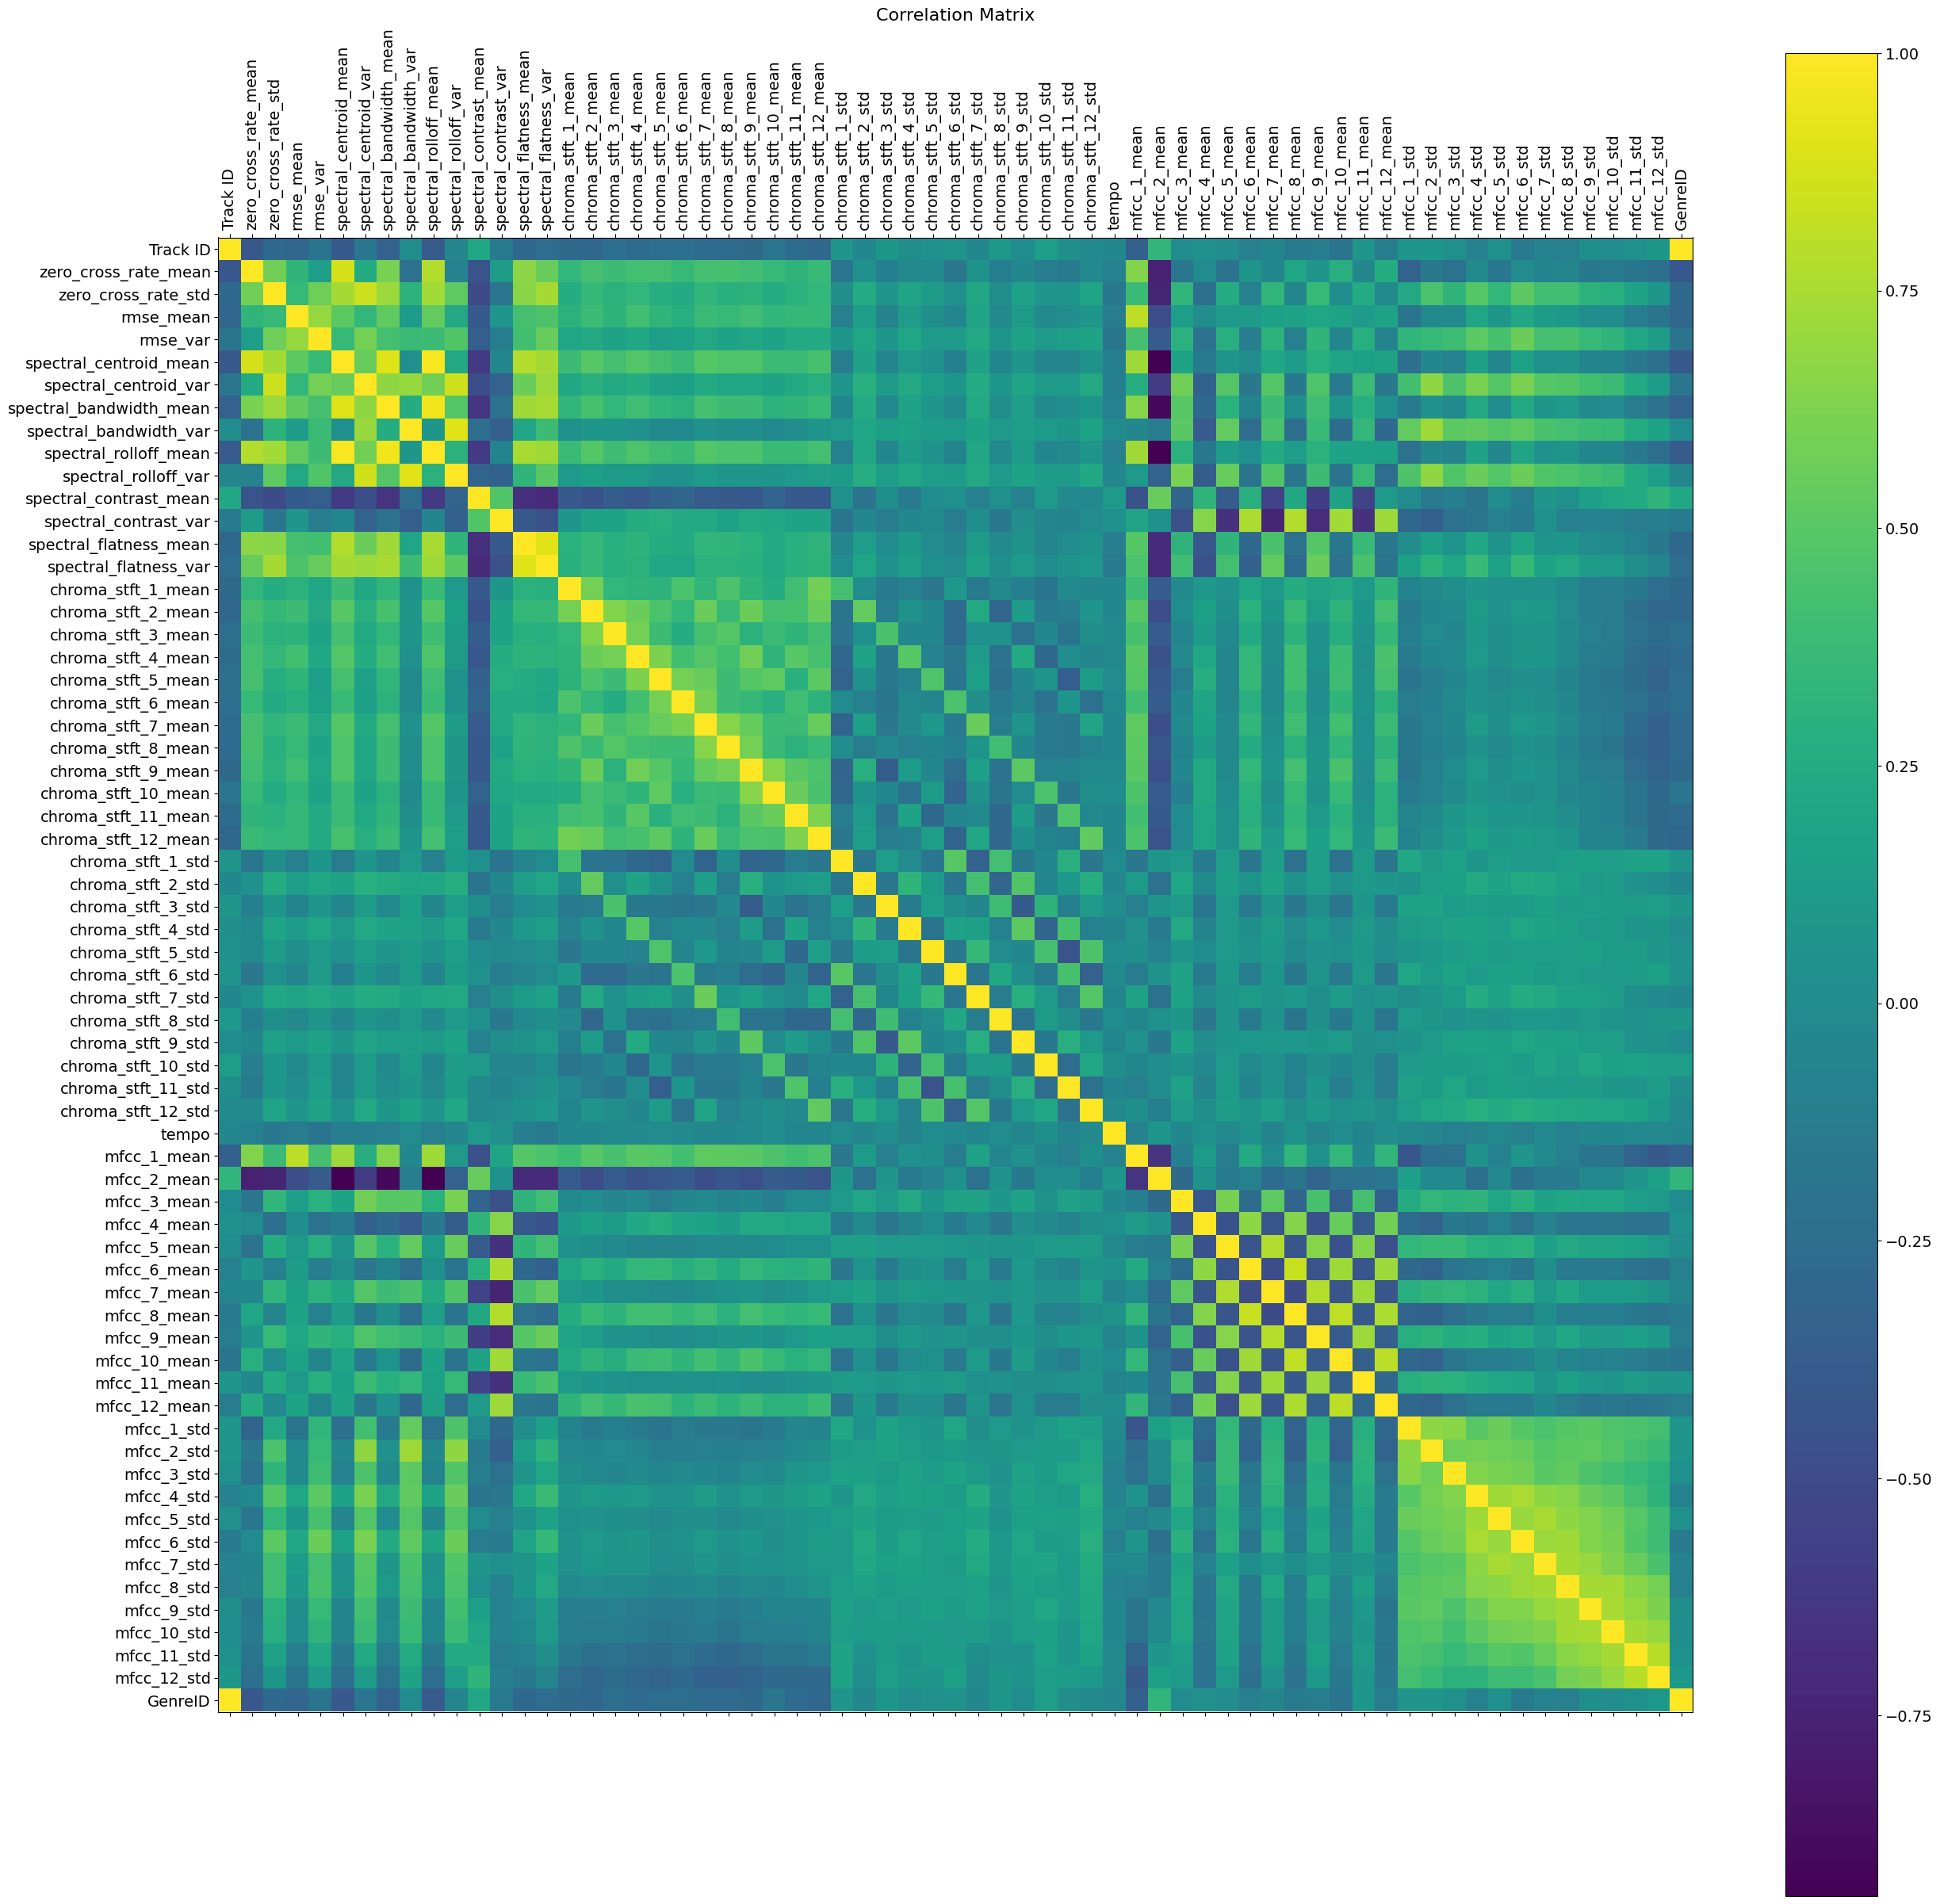

In [42]:
df_for_corr = df30s.drop(columns='Genre')
f = plt.figure(figsize=(30,30))
plot_corr(df_for_corr, figNumber=f.number)

## Task 3 feature selection

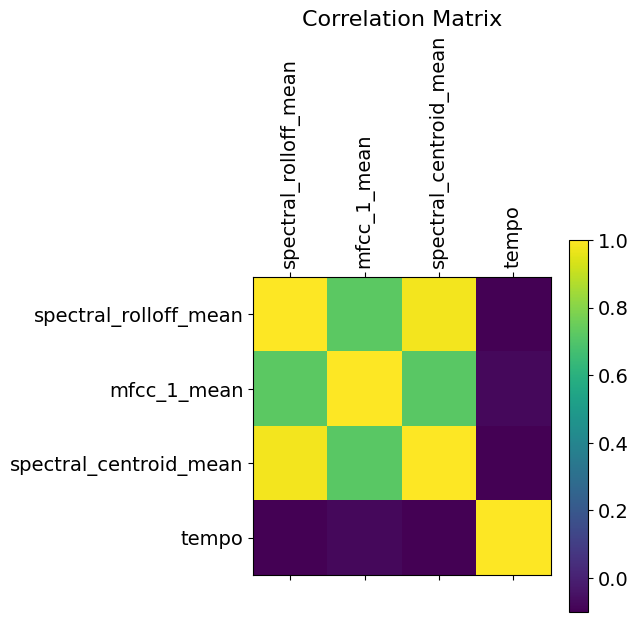

In [43]:
# Check correlation of previously used features
initial_df = task1_df().drop(columns=['Genre'])
plot_corr(initial_df)

We see that tempo is completely uncorelated with the 3 other features, while spectral rolloff and centroid means are very strongly correlated 

In [44]:
highest_corr = df_for_corr.corr()['GenreID'].abs().sort_values().tail(11).drop(['Track ID', 'GenreID'])
highest_corr

chroma_stft_12_mean        0.287200
chroma_stft_2_mean         0.287791
rmse_mean                  0.303106
spectral_bandwidth_mean    0.326553
mfcc_2_mean                0.333709
mfcc_1_mean                0.344760
spectral_rolloff_mean      0.384887
spectral_centroid_mean     0.399847
zero_cross_rate_mean       0.413442
Name: GenreID, dtype: float64

the 4 highest correlations with the target are ```zero_cross_rate_mean```, ```spectral_centroid_mean```, ```spectral_rolloff_mean``` and ```mfcc_1_mean```.   
We now look at the pairwise correlations to choose the best feature, since we want to minimize pairwise correlation in our 4 features  

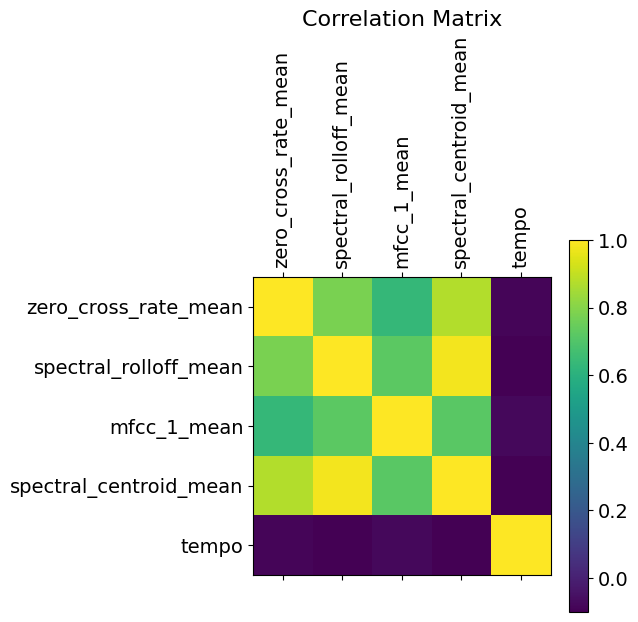

In [46]:
plot_corr(df_for_corr[["zero_cross_rate_mean", "spectral_rolloff_mean", "mfcc_1_mean", "spectral_centroid_mean", "tempo"]])

We want to remove either spectral centroid or spectral rolloff since they are highly correlated. Since zero_cross_rate_mean is more correlated to spectral_centroid_mean, we remove spectral centroid mean.

We thus have as the 4 features selected for task 3 : 
["zero_cross_rate_mean", "spectral_rolloff_mean", "mfcc_1_mean", "tempo" ]